1. Forward and backward pass for batchnorm and dropout have been implemented in layers.py fiile

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from fc_net import *
from data_utils import get_CIFAR10_data
from solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [3]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000L, 3L, 32L, 32L)
X_train:  (49000L, 3L, 32L, 32L)
X_test:  (1000L, 3L, 32L, 32L)
y_val:  (1000L,)
y_train:  (49000L,)
y_test:  (1000L,)


In [13]:
X_test = data['X_test']
X_val = data['X_val']
y_test = data['y_test']
y_val = data['y_val']

# Fully connected net with batchnorm/dropout and sgd update rule

### ReLu activation function

In [ ]:
learning_rate = 5e-2
weight_scale = 4e-2
dropout = 0.15
model = FullyConnectedNet([100, 100, 100, 100,100],act_func='relu',weight_scale=weight_scale, dtype=np.float64,dropout=dropout,use_batchnorm=True)
solver = Solver(model, data,
                print_every=300, num_epochs=20, batch_size=250,
                update_rule='adam',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

model_fcrelu = model
solver_fcrelu = solver

y_test_pred = np.argmax(model.loss(X_test), axis=1)
y_val_pred = np.argmax(model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

### Softplus activation function

In [ ]:
# best fc softplus
learning_rate = 5e-2
weight_scale = 4e-2
dropout = 0.15
model = FullyConnectedNet([100, 100, 100, 100, 100],act_func='softplus',weight_scale=weight_scale, dtype=np.float64,dropout=dropout,use_batchnorm=True)
solver = Solver(model, data,
                print_every=300, num_epochs=20, batch_size=250,
                update_rule='adam',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

model_fcsoftplus = model
solver_fcsoftplus = solver

y_test_pred = np.argmax(model.loss(X_test), axis=1)
y_val_pred = np.argmax(model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

### Leaky ReLu activation function

In [ ]:
learning_rate = 7e-2
weight_scale = 4e-2
dropout = 0.15
model = FullyConnectedNet([100, 100, 100, 100, 100],act_func='leakyrelu',weight_scale=weight_scale, dtype=np.float64,dropout=dropout,use_batchnorm=True)
solver = Solver(model, data,
                print_every=300, num_epochs=20, batch_size=250,
                update_rule='adam',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

model_fcleakyrelu = model
solver_fcleakyrelu = solver

y_test_pred = np.argmax(model.loss(X_test), axis=1)
y_val_pred = np.argmax(model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

### ELu activation function

In [ ]:
learning_rate = 5e-2
weight_scale = 4e-2
dropout = 0.15
model = FullyConnectedNet([100, 100, 100, 100, 100],act_func='elu',weight_scale=weight_scale, dtype=np.float64,dropout=dropout,use_batchnorm=True)
solver = Solver(model, data,
                print_every=300, num_epochs=20, batch_size=250,
                update_rule='adam',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

model_fcelu = model
solver_fcelu = solver

y_test_pred = np.argmax(model.loss(X_test), axis=1)
y_val_pred = np.argmax(model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

### Plotting Training and validation accuracy graphs for all activation functions

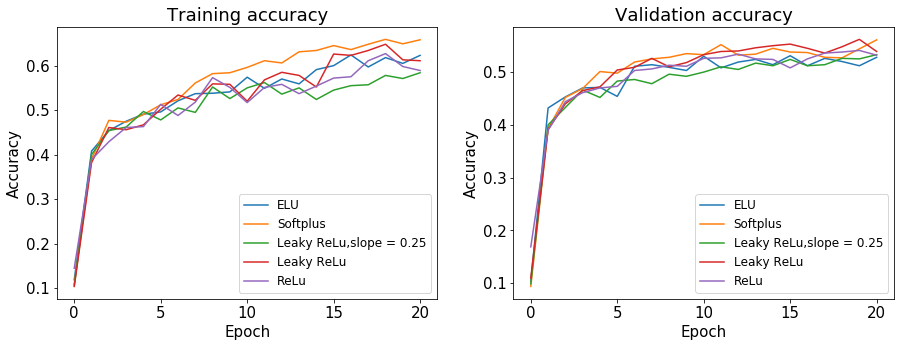

In [44]:
import matplotlib



plt.subplot(1,2,1)

plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.plot(solver_fcelu.train_acc_history, label='ELU')
plt.plot(solver_fcsoftplus.train_acc_history,  label='Softplus')
plt.plot(solver_fcleakyrelu25.train_acc_history,  label='Leaky ReLu,slope = 0.25')
plt.plot(solver_fcleakyrelu.train_acc_history,  label='Leaky ReLu')
plt.plot(solver_fcrelu.train_acc_history,  label='ReLu')

plt.legend(loc='lower right',prop={'size': 12})
matplotlib.rcParams.update({'font.size': 15})


plt.subplot(1,2,2)
plt.title('Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.plot(solver_fcelu.val_acc_history, label='ELU')
plt.plot(solver_fcsoftplus.val_acc_history,  label='Softplus')
plt.plot(solver_fcleakyrelu25.val_acc_history,  label='Leaky ReLu,slope = 0.25')
plt.plot(solver_fcleakyrelu.val_acc_history,  label='Leaky ReLu')
plt.plot(solver_fcrelu.val_acc_history,  label='ReLu')

plt.legend(loc='lower right',prop={'size': 12})

matplotlib.rcParams.update({'font.size': 15})


plt.gcf().set_size_inches(15, 5)
plt.show()